<a href="https://colab.research.google.com/github/lalitpandey02/PythonNotebooks/blob/main/Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

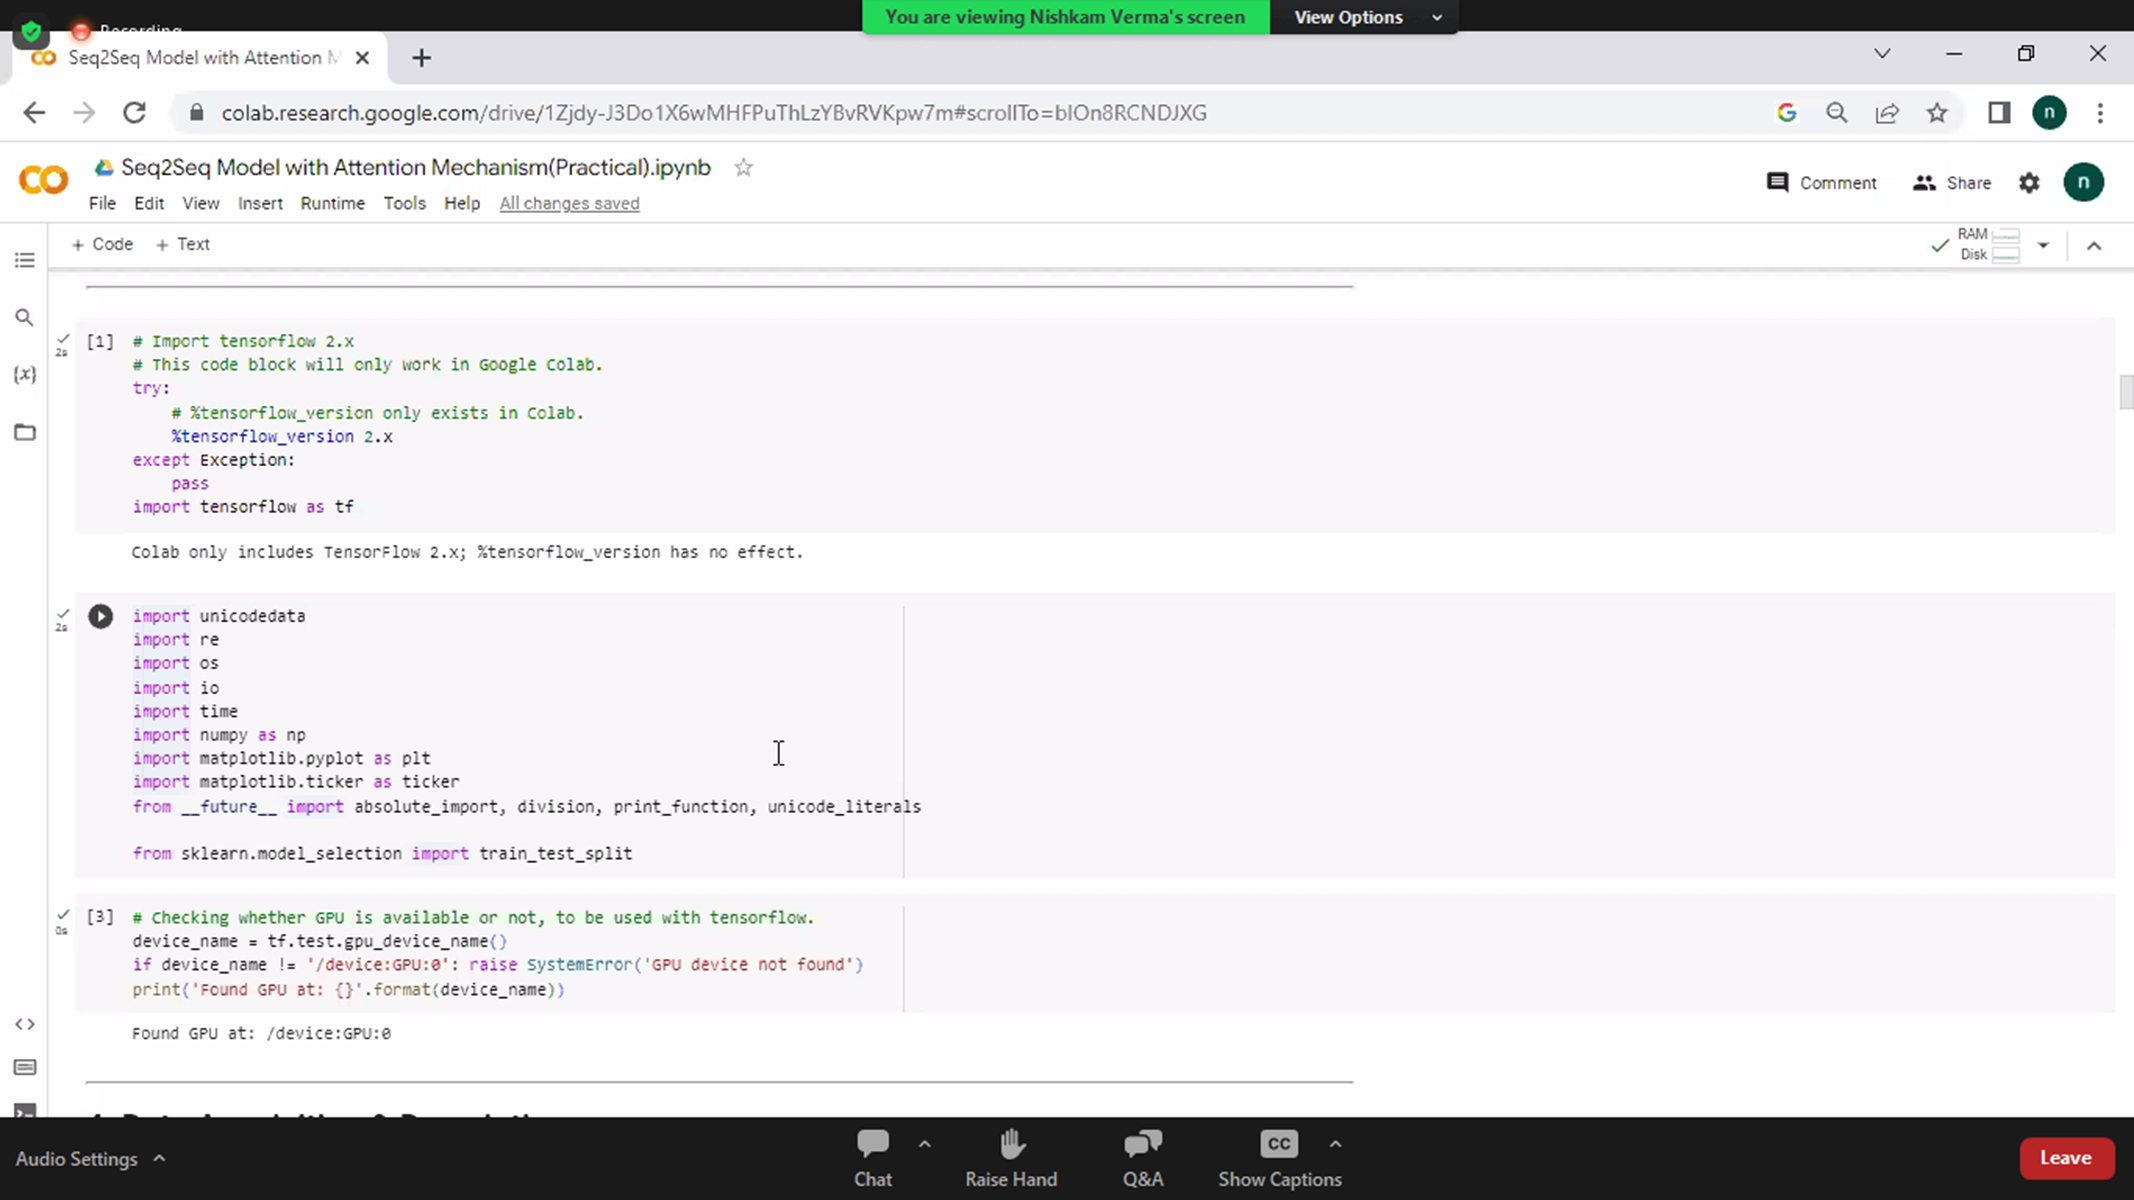

In [ ]:
import unicodedata
import re
import os
import io
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from __future__ import absolute_import, division, print_function, unicode_literals

from sklearn.model_selection import train_test_split

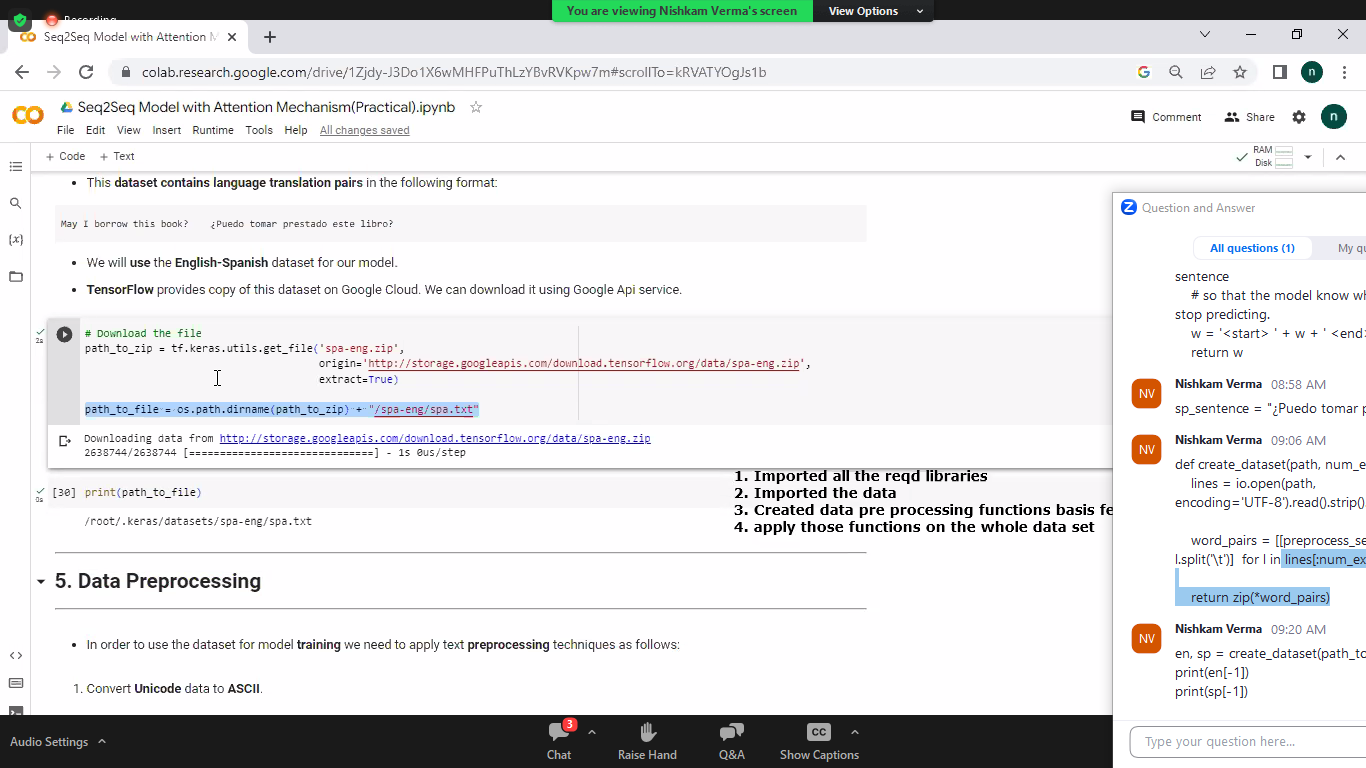

In [ ]:
#Download the file
path_to_zip = tf.keras.utils.get_file('spa-eng.zip',
                                      origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
                                      extract=True)
path_to_file = os.path.dirname(path_to_zip) + "/spa-eng/spa.txt"

In [ ]:
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')


In [ ]:
def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())

    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)

    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)

    w = w.rstrip().strip()

    # adding a start and an end token to the sentence
    # so that the model know when to start and stop predicting.
    w = '<start> ' + w + ' <end>'
    return w


In [ ]:
en_sentence = "May I borrow this book"
sp_sentence = "¿Puedo tomar prestado este libro?"

In [ ]:
print(preprocess_sentence(en_sentence))

<start> may i borrow this book <end>


In [ ]:
print(preprocess_sentence(sp_sentence))

<start> ¿ puedo tomar prestado este libro ? <end>


In [ ]:
def create_dataset(path, num_examples):
    lines = io.open(path, encoding='UTF-8').read().strip().split('\n')

    word_pairs = [[preprocess_sentence(w) for w in l.split('\t')]  for l in lines[:num_examples]]

    return zip(*word_pairs)


In [ ]:
en , sp = create_dataset(path_to_file,None)
print(en[-1])
print(sp[-1])

<start> if you want to sound like a native speaker , you must be willing to practice saying the same sentence over and over in the same way that banjo players practice the same phrase over and over until they can play it correctly and at the desired tempo . <end>
<start> si quieres sonar como un hablante nativo , debes estar dispuesto a practicar diciendo la misma frase una y otra vez de la misma manera en que un musico de banjo practica el mismo fraseo una y otra vez hasta que lo puedan tocar correctamente y en el tiempo esperado . <end>


In [ ]:
def max_length(tensor):
  return max(len(t) for t in tensor)

In [ ]:
def tokenize(lang):
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    lang_tokenizer.fit_on_texts(lang)

    tensor = lang_tokenizer.texts_to_sequences(lang)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, lang_tokenizer


In [ ]:
def load_dataset(path, num_examples=None):
    # creating cleaned input, output pairs
    inp_lang, targ_lang = create_dataset(path, num_examples)

    input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
    target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

    return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer


In [ ]:
# Try experimenting with the size of the dataset
num_examples = 30000
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(path_to_file, num_examples)

# Calculate max_length of the target tensors
max_length_inp, max_length_targ = max_length(input_tensor), max_length(target_tensor)


In [ ]:
# Calculate Max length of any input sequence.
def max_length(tensor):
    return max(len(t) for t in tensor)

In [ ]:
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, 
                                                                                                target_tensor, 
                                                                                                test_size=0.2)

# Show length
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))


24000 24000 6000 6000


In [ ]:
def convert(lang, tensor):
    for t in tensor:
        if t!=0:
            print ("%d ----> %s" % (t, lang.index_word[t]))


In [ ]:
print("Input Language ; Index to word mapping")
convert(inp_lang, input_tensor_train[7])
print()
print("Target")
convert(targ_lang, target_tensor_train[7])

Input Language ; Index to word mapping
1 ----> <start>
10 ----> it
11 ----> s
9 ----> a
766 ----> simple
134 ----> job
3 ----> .
2 ----> <end>

Target
1 ----> <start>
7 ----> es
15 ----> un
80 ----> trabajo
924 ----> simple
3 ----> .
2 ----> <end>
